In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller

In [3]:
df=pd.read_csv("C:/Users/HP/Desktop/hamoye/household_power_consumption.txt", sep=";")
df.head()

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


convert column to datetime

In [4]:
df["Time"] = pd.to_datetime(df["Time"])

In [6]:
df.set_index("Time", inplace=True)
plt.figure(figsize=(10,6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

TypeError: 0.596 is not a string

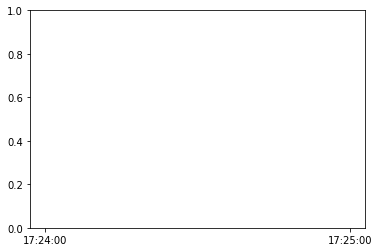

In [7]:
plt.plot(df.index, df.Global_active_power, '--', marker='*', )
plt.grid()
plt.xlabel('Voltage')
plt.ylabel('Global_active_power')

check for missing values

In [8]:
df.isnull().values.any()

True

missing values, we will make a copy of our dataset and delete some values at random.

In [9]:
df.copy()
rows = df.copy.sample(frac=0.1, random_state=0)
rows['Time'] = np.nan
df.copy.loc[rows.index, 'Time'] = rows['Time']
df.copy.isnull().sum()

AttributeError: 'function' object has no attribute 'sample'

Filling missing data by imputation - Forward fill

In [7]:
df.copy_ffill = df_copy.fillna(method='ffill')
df.copy_ffill.isnull().sum()

NameError: name 'df_copy' is not defined

Filling missing data by imputation - Backward fill

In [ ]:
df.copy_bfill = df.copy.fillna(method='bfill')
df.copy_bfill.isnull().sum()

Filling missing data by interpolation

In [ ]:
df_copy_LIF = df_copy.interpolate(method='linear', limit_direction='forward')
df_copy_LIF.isnull().sum()
df_copy_LIB = df_copy.interpolate(method='linear', limit_direction='backward')
df_copy_LIB.isnull().sum()

In [ ]:
df_MA = df.copy()
MA = df_MA['Passengers'].rolling(12).mean()

In [ ]:
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df['Time'], model='additive')
decompose_series.plot()
plt.show()

The decomposed time series show an obvious increasing trend and seasonality variations. Recall that we have initially plotted the moving average on the last 12 months which showed that it varies with time. This suggests that the data is not stationary. We will now perform an ADF test to confirm this speculation

In [ ]:
adf_result = adfuller(df['time'])
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'No. of lags used: {adf_result[2]}')
print(f'No. of observations used : {adf_result[3]}')
print('Critical Values:')
for k, v in adf_result[4].items():
    print(f'   {k}: {v}') 

results in

In [ ]:
ADF Statistic: 0.815368879206047
p-value: 0.991880243437641
No. of lags used: 13
No. of observations used : 130
Critical Values:
   1%: -3.4816817173418295
   5%: -2.8840418343195267
   10%: -2.578770059171598

From the results obtained, the p-value is greater than the critical value at a 5% #significance level and, the ADF statistic is greater that any of the critical values obtain. #This confirms that the series is indeed non-stationary.
Convert time series to stationary by removing trend and seasonality
Transformation and Differencing

In [ ]:
df_log = np.log(df)
df_diff = df_log.diff(periods=1)
plt.plot(df_diff.index, df_diff.Passengers, '-')
plt.plot(df_diff.rolling(12).mean(), color='red')

Downsample to quarterly data points

In [ ]:
df_quarterly = df.resample('3M').mean()

#Upsample to daily data points
df_daily = df.resample('D').mean()

Upsample to daily data points

In [ ]:
df_daily = df.resample('D').mean()